### Package

import pandas as pd
import numpy as np
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Data 

`old_cust_df`  is a **merged** dataframe containing *customer demographic*, *customer transactions* and *customer address* data-sets

`new_cust_df`  is a **merged** dataframe containing old and new *customer demographic* and *customer address* data-sets

old_cust_df = pd.read_csv("Customer_Details_Old_Final.csv")
new_cust_df = pd.read_csv("Customer_DF_Final.csv")
old_cust_df.drop(columns="Unnamed: 0", inplace=True)
new_cust_df.drop(columns="Unnamed: 0", inplace=True)
print("Dimension of {}: {}".format("old_cust_df", old_cust_df.shape))

### Preprocess 

new_cust_df["state"] = new_cust_df["state"].replace(["NSW", "QLD", "VIC"],["New South Wales", "Queensland", "Victoria"])
old_cust_df["state"] = old_cust_df["state"].replace(["NSW", "QLD", "VIC"],["New South Wales", "Queensland", "Victoria"])

set(old_cust_df['state'])

set(new_cust_df["state"].to_list())

### Plots

####  Correlation Matrix, an overall view

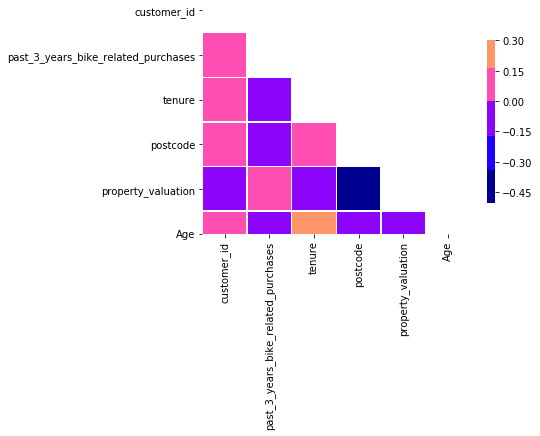

In [11]:
mat = new_cust_df.corr()
mas = np.triu(np.ones_like(mat, dtype=bool))
col = sns.color_palette("gnuplot2")
sns.heatmap(mat, mask=mas, cmap=col, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Observations**: 

* It's seen that `Tenure` and `Age` are highly correlated, i.e `Tenure` increases along with `Age`
* The `Past 3 years purchases` feature has strong correlation with `Property valuation`

In [12]:
def box(x,y,color,xlab,ylab):
    grph = sns.boxplot(x=x, y=y, data=new_cust_df, color = color)
    grph.set(xlabel=xlab, ylabel = ylab)

#### Bike purchase in 3 years vs. Wealth Segment Distribution 

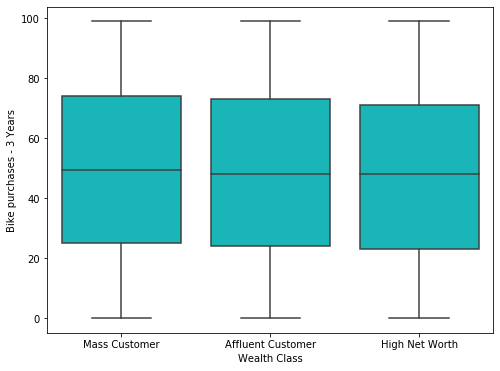

In [13]:
box("wealth_segment", "past_3_years_bike_related_purchases", "darkturquoise", 
    "Wealth Class", "Bike purchases - 3 Years")

**Observations**: 

* All the three wealth classes have a `Median` 3 years buying almost around `≈50`
* All the three classes seems to have a `Normal Distribution`
* `50%`of the data in the distribution for all the thee classes lie between `≈27 - ≈75` purchases 
* The distributions are spreaded with a range of `≈100` 3 years purchases 

#### Bike purchase in 3 years vs. Gender 

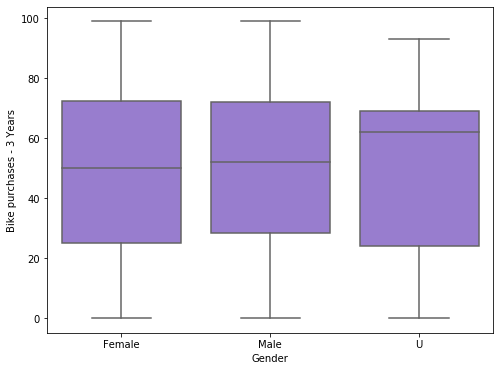

In [14]:
box("gender", "past_3_years_bike_related_purchases", "mediumpurple", "Gender", 
    "Bike purchases - 3 Years")

**Observations**: 

* From the plot it is visible that the `Female` category has a greater range than that of the `Male`
* The distribution of the `Female` is completely `Normal` whereas the `Male` is not symmetric
* `50%`of the data for the `Female` class lie between `≈27 - ≈75` purchases 

#### Bike purchase in 3 years vs. Industry Class

[Text(0, 0.5, 'Job Industry'), Text(0.5, 0, 'Bike purchases - 3 Years')]

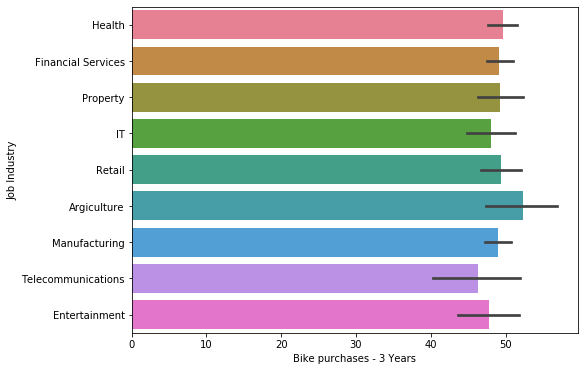

In [15]:
ax = sns.barplot(y="job_industry_category", x="past_3_years_bike_related_purchases", 
                 data=new_cust_df, palette="husl")
ax.set(xlabel="Bike purchases - 3 Years", ylabel = "Job Industry")

**Observations**: 

* According to the data, customers who are in `Agriculture` sector have invested more on bikes in past 3 years
* The customers in `Telecommunications` are the lowest in terms of `Mean` bike purchase in past 3 years 
* The `Mean` purchases among the `Entertainment` field lies between `0 - 47` 
* The purchases data in the `Manufacturing` field are more accurately distributed and are more reliable for analysis
* The `Telecommunications` purchase data is the least reliabe. The distribution is not tight.

#### Bike purchase in 3 years vs. State 

<Figure size 576x432 with 0 Axes>

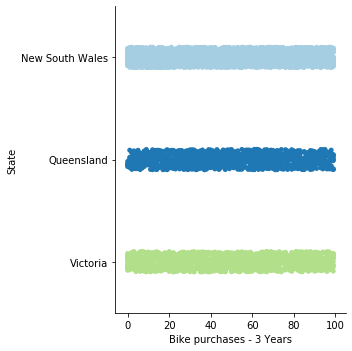

In [16]:
ax = sns.catplot(y="state",x="past_3_years_bike_related_purchases",data=new_cust_df, palette="Paired")
ax.set(xlabel="Bike purchases - 3 Years", ylabel = "State")

**Observations**: 

* The customers from `New South Wales` has the most purchase rate that the remaining states
* The `Queensland` along with the `Victoria` data are unreliable for analysis due to less data-points
* There are less data points from `Victoria` hence the distribution is highly spread out with a huge `Error`
* The data-points from `NSW` are tight enough and highly reliable with the least `Error`

#### Bike purchase in 3 years vs. Own cars 

<Figure size 288x288 with 0 Axes>

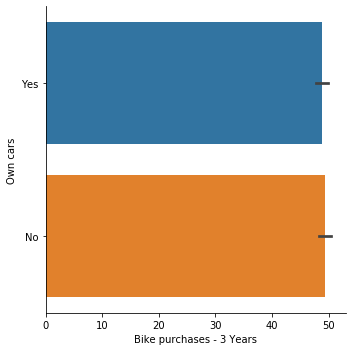

In [24]:
ax = sns.catplot(y="owns_car", x="past_3_years_bike_related_purchases", kind="bar", data=new_cust_df)
ax.set(xlabel="Bike purchases - 3 Years", ylabel = "Own cars")

**Observations**

* The customers with `No cars` tend to have slightly bigger `Mean` of bikes in 3 years

*`Point Biserial`* correlation of purchase rate against the categories

In [13]:
encode = LabelEncoder()
new_cust_df["Cars_bool"] = encode.fit_transform(new_cust_df["owns_car"])
new_cust_df_corr = new_cust_df[["past_3_years_bike_related_purchases", "owns_car", "Cars_bool"]]
new_cust_df_corr.rename(columns={"past_3_years_bike_related_purchases": "Bike purchases - 3 Years", 
                                 "Cars_bool": "Own cars"}, inplace = True)

C:\Users\ADIPTA BISWAS\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [14]:
new_cust_df_corr.corr()

,Bike purchases - 3 Years,Own cars
Bike purchases - 3 Years,1.000000,-0.009244
Own cars,-0.009244,1.000000


**Observations**

* From `Point Biserial Corr.` we can see that owning a car and purchase of bikes in 3 years have `Negative correlation`
* The correlation between Bike purchase in 3 years and customers owning cars is `-0.009`

####  Bike purchase in 3 years vs. Product Size (Other)

<Figure size 576x432 with 0 Axes>

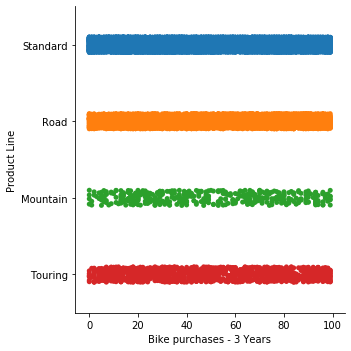

In [15]:
ax = sns.catplot(y="product_line",x="past_3_years_bike_related_purchases",data=old_cust_df)
ax.set(xlabel="Bike purchases - 3 Years", ylabel = "Product Line")

**Observations**

* The `Standard` bikes were the favourite followed by the `Road` line
* The customers were not that fond of `Mountain` in the given 3 years
* The distribution for `Touring` bikes are sparse due to less data-points

By: *`Adipta`*